# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2003 ГрязновНиколайАлександрович
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [41]:
import pandas as pd #работа с таблицами
from pyvis.network import Network
import networkx as nx #работа с графами
import math
import copy
import random
import time
import matplotlib.pyplot as plt #построение графов

In [42]:
#генерация графа
def generate_matrix():
    size = random.randint(30, 100)
    matrix = [[math.inf for i in range(size)] for j in range(size)]
    for i in range(size):
        for j in range(size):
            if random.randint(0, 3) == 3 and i != j:
                rand_count = random.randint(1, 20)
                matrix[i][j] = rand_count
    return matrix

#графическая настойка отображения графа
options = """var options = {
  "edges": {
    "arrows": {
      "to": {
        "enabled": true
      }
    },
    "color": {
      "inherit": true
    },
    "smooth": false
  },
  "interaction": {
    "navigationButtons": true
  },
  "physics": {
    "minVelocity": 0.75
  }
}
"""

#отображение графа
def draw_graph(graph, path = None):
    colors = None
    if path:
        colors = []
        for item in graph.edges():
            try:
                index1 = path.index(item[0])
                index2 = path.index(item[1])
                if index1 + 1 != index2 and index1 - 1 != index2:
                    raise
                colors.append('red')
            except:
                colors.append('black')
    pos = nx.circular_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = 'green', node_size = 200, pos = pos)
    nx.draw_networkx_edges(graph,edge_color = colors, pos = pos, arrowstyle = 'simple, tail_width = 0.05')
    nx.draw_networkx_labels(graph, pos = pos)
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels)
    
#создание графа, используя матрицу смежности
def create_graph(matrix : list) -> nx.DiGraph:
    graph = nx.DiGraph()
    for i in range(1, len(matrix)):
        graph.add_node(i)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and i != j:
                graph.add_edge(i + 1, j + 1, weight=matrix[i][j], label=matrix[i][j])
    for edge in graph.edges():
        graph.edges[edge]['color'] = 'blue'
    return graph

#### Алгоритм Флойда-Уоршелла

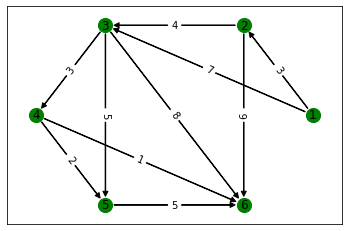

In [43]:
#достаём матрицу из файла
with open("matr.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
                
#создаём граф
graph = create_graph(matrix)

draw_graph(graph)
#отображаем граф из файла
nt = Network(notebook = True)
nt.from_nx(graph)
nt.set_options(options)
nt.show("test.html")

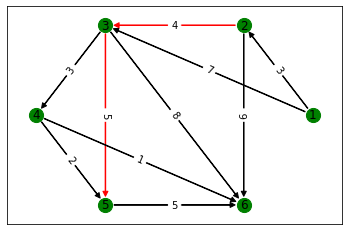

In [44]:
#поиск путя
def get_path(H, v, u):
    v -= 1
    u -= 1
    result = []
    result.append(v)
    while v != u:
        v = H[v][u]
        result.append(v)
    __result = [el + 1 for el in result]
    return __result


#алгоритм
def floyd(matrix):
    W = copy.deepcopy(matrix)
    N = len(W)
    H = [[0 for i in range(N)] for j in range(N)]
    for i in range(len(W)):
        for j in range(len(W)):
            if W[i][j] != math.inf:
                H[i][j] = j
    for i in range(len(W)):
        for j in range(len(W)):
            if i == j: continue
            if W[i][j] != math.inf:
                for k in range(len(W)):
                    if i == k or j == k: continue
                    if W[i][k] > W[i][j] + W[j][k]:
                        W[i][k] = W[i][j] + W[j][k]
                        H[i][k] = H[i][j]
    return (W, H)


result = floyd(matrix)
path = get_path(result[1], 2, 5)


#вносим графические изменения
graph1 = copy.deepcopy(graph)
for i in range(1, len(path)):
    graph1.nodes[path[i - 1]]['color'] = 'red'
    graph1.edges[path[i - 1], path[i]]['color'] = 'red'
graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph, path)

#отображаем граф с решением
nt1 = Network(notebook=True)
nt1.set_options(options)
nt1.from_nx(graph1)
nt1.show("test1.html")

In [45]:
#определение скорости работы алгоритма

tests = []

for i in range(20):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(len(temp_matrix)):
            if temp_matrix[i][j] != math.inf:
                edge_counts += 1
    t1 = time.time()
    result = floyd(temp_matrix)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,34,276,15
1,92,2091,267
2,45,480,32
3,75,1291,120
4,41,441,21
5,97,2342,284
6,98,2373,264
7,61,902,73
8,93,2132,219
9,30,230,6


#### Алгоритм Дейкстры

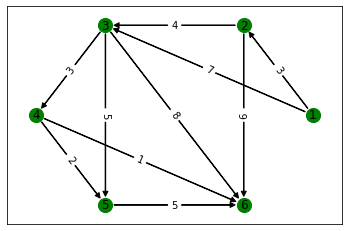

In [46]:
#достаём матрицу из файла
with open("matr.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf

#создаём граф
graph = create_graph(matrix)

draw_graph(graph)

#отображаем граф из файла
nt = Network(notebook = True)
nt.from_nx(graph)
nt.set_options(options)
nt.show("test.html")

Длина 9


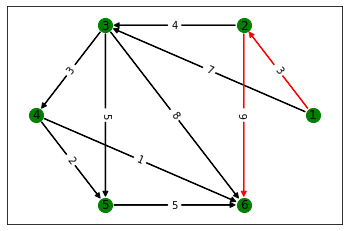

In [47]:
#алгоритм
def dijkstra(__matrix, v, u):
    matrix = copy.deepcopy(__matrix)
    v -= 1
    u -= 1
    N = len(matrix)
    D = [matrix[v][i] for i in range(N)]
    D[v] = 0
    P = [[v] for i in range(N)]
    checked_nodes = {v}
    for i in range(N):
        temp_min = math.inf
        node = None
        for j in range(N):
            if D[j] < temp_min and j not in checked_nodes:
                temp_min = D[j]
                node = j
        if node is not None:
            checked_nodes.add(node)
            for k in range(N):
                if D[k] > matrix[node][k] + D[node]:
                    D[k] = matrix[node][k] + D[node]
                    P[k] = copy.deepcopy(P[node])
                    P[k].append(node)
        else:
            break
                    
    for i in range(N):
        if D[i] != math.inf and P[i][0] != i:
            P[i].append(i)
    
    if D[u] == math.inf:
        path = []
    else:
        path = [el + 1 for el in P[u]]
    return (D, path, P)



result = dijkstra(matrix, 1, 6)
path = result[1]



#вносим графические изменения

graph1 = copy.deepcopy(graph)
if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph1, path)
print(f"Длина {result[0][5]}")

#отображаем граф с решением
nt1 = Network(notebook=True)
nt1.set_options(options)
nt1.from_nx(graph1)
nt1.show("test1.html")

In [48]:
#определение скорости работы алгоритма
tests = []

for i in range(20):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(len(temp_matrix)):
            if temp_matrix[i][j] != math.inf:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    result = dijkstra(temp_matrix, c1, c2)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,89,1953,11
1,50,613,5
2,43,469,3
3,81,1676,9
4,44,475,2
5,77,1408,6
6,79,1546,7
7,78,1544,7
8,94,2114,9
9,32,236,1


#### Алгоритм Беллмана-Форда

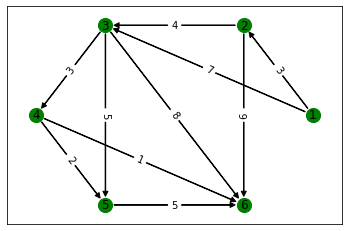

In [49]:
#достаём матрицу из файла
with open("matr.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
#создаём граф
graph = create_graph(matrix)

draw_graph(graph)

#отображаем граф из файла
nt = Network(notebook = True)
nt.from_nx(graph)
nt.set_options(options)
nt.show("test.html")

Длина 6


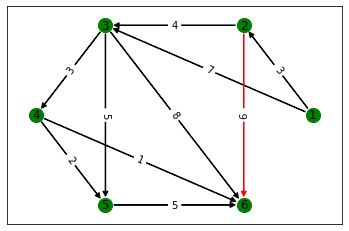

In [50]:
#алгоритм
def bell_ford(matrix, v, u):
    v -= 1
    u -= 1
    N = len(matrix)
    cycle = False
    A = [[math.inf for i in range(N)] for j in range(N)]
    P = [[v] for i in range(N)]
    A[0][v] = 0
    for k in range(1, N):
        A[k] = copy.deepcopy(A[k - 1])
        for i in range(N):
            for j in range(N):
                if matrix[i][j] == math.inf:
                    continue
                if A[k][j] > A[k - 1][i] + matrix[i][j]:
                    A[k][j] = A[k - 1][i] + matrix[i][j]
                    P[j] = copy.deepcopy(P[i])
                    P[j].append(j)
    if A[-1] != A[-2]:
        cycle = True
    if A[-1][u] == math.inf or len(P[u]) == 1:
        path = []
    else:
        path = [el + 1 for el in P[u]]
    return (A[-1], path, P, cycle)

result = bell_ford(matrix, 2, 6)
path = result[1]

#вносим графические изменения
graph1 = copy.deepcopy(graph)
if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph1, path)
print(f"Длина {result[0][5]}")

#отображаем граф с решением
nt1 = Network(notebook=True)
nt1.set_options(options)
nt1.from_nx(graph1)
nt1.show("test1.html")

In [51]:
#определение скорости работы алгоритма

tests = []

for i in range(20):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(i):
            if temp_matrix[j][i] != 0:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    result = bell_ford(temp_matrix, c1, c2)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,72,2556,98
1,98,4753,230
2,31,465,7
3,93,4278,176
4,99,4851,221
5,36,630,13
6,43,903,25
7,59,1711,57
8,36,630,14
9,32,496,8


#### Алгоритм Джонсона

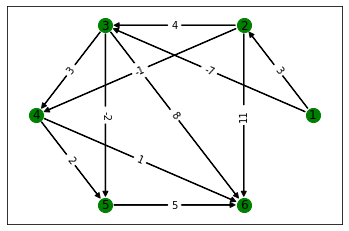

In [52]:
#достаём матрицу из файла
with open("matr1.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
#создаём граф
graph = create_graph(matrix)

draw_graph(graph)

#отображаем граф из файла
nt = Network(notebook = True)
nt.from_nx(graph)
nt.set_options(options)
nt.show("test.html")

Длина -4


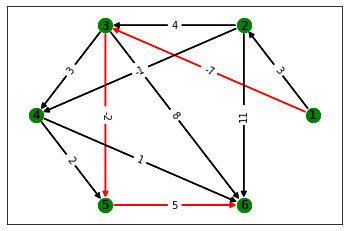

In [53]:
#алгоритм
def johnson(__matrix, v, u):
    v -= 1
    u -= 1
    w = copy.deepcopy(__matrix)
    matrix = copy.deepcopy(__matrix)
    N = len(matrix)
    for i in range(N):
        w[i].append(math.inf)
    w.append([0 for i in range(N + 1)])
    temp_result = bell_ford(w, N + 1, 1)
    if temp_result[3] == True:
        return ([], [], [])
    for i in range(N):
        for j in range(N):
            if matrix[i][j] != math.inf and temp_result[0][i] != math.inf and temp_result[0][j] != math.inf:
                matrix[i][j] += temp_result[0][i] - temp_result[0][j]
    distArr = []
    pathArr = []
    for i in range(N):
        dijkstra_result = dijkstra(matrix, i + 1, i + 1)
        distArr.append(dijkstra_result[0])
        pathArr.append(dijkstra_result[2])
    for i in range(N):
        for j in range(N):
            if distArr[i][j] != math.inf and temp_result[0][i] != math.inf and temp_result[0][j] != math.inf:
                distArr[i][j] += temp_result[0][j] - temp_result[0][i]
    
    return (distArr, [el + 1 for el in pathArr[v][u]], pathArr)


result = johnson(matrix, 1, 6)
path = result[1]

#вносим графические изменения
graph1 = copy.deepcopy(graph)
if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph1, path)
print(f"Длина {result[0][0][5]}")

#отображаем граф с решением
nt1 = Network(notebook=True)
nt1.set_options(options)
nt1.from_nx(graph1)
nt1.show("test1.html")
draw_graph(graph1, path)

In [54]:
#определение скорости работы алгоритма

tests = []

for i in range(20):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(i):
            if temp_matrix[j][i] != 0:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    result = johnson(temp_matrix, c1, c2)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,48,1128,160
1,49,1176,169
2,94,4371,1099
3,87,3741,924
4,91,4095,1153
5,92,4186,1063
6,34,561,61
7,81,3240,645
8,65,2080,344
9,67,2211,384


#### Алгоритм Левита

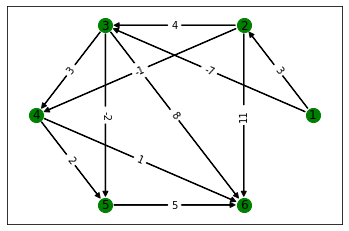

In [55]:
#достаём матрицу из файла
with open("matr1.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
#создаём граф
graph = create_graph(matrix)

draw_graph(graph)

#отображаем граф из файла
nt = Network(notebook = True)
nt.from_nx(graph)
nt.set_options(options)
nt.show("test.html")

Длина -4


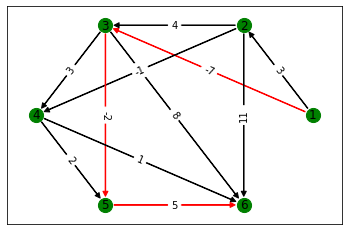

In [56]:
#алгоритм
def levit(__matrix, v, u):
    v -= 1
    u -= 1
    matrix = copy.deepcopy(__matrix)
    N = len(matrix)
    paths = [[v] for i in range(N)]
    distance = [math.inf for i in range(N)]
    distance[v] = 0
    m0 = set()
    m1 = {"main_queue" : [v], "urgent_queue": []}
    m2 = set(range(N))
    m2.remove(v)
    while len(m1["main_queue"]) or len(m1["urgent_queue"]):
        if len(m1["urgent_queue"]):
            cur_node = m1["urgent_queue"].pop(0)
        else:
            cur_node = m1["main_queue"].pop(0)
        for temp_node in range(N):
            if distance[temp_node] == math.inf and matrix[cur_node][temp_node] == math.inf:
                continue
            if temp_node in m2:
                m2.remove(temp_node)
                calculated_distance = distance[cur_node] + matrix[cur_node][temp_node]
                if calculated_distance < distance[temp_node]:
                    distance[temp_node] = calculated_distance
                    paths[temp_node] = copy.deepcopy(paths[cur_node])
                    paths[temp_node].append(temp_node)
                m1["main_queue"].append(temp_node)
            elif temp_node in m1["main_queue"] or temp_node in m1["urgent_queue"]:
                calculated_distance = distance[cur_node] + matrix[cur_node][temp_node]
                if calculated_distance < distance[temp_node]:
                    distance[temp_node] = calculated_distance
                    paths[temp_node] = copy.deepcopy(paths[cur_node])
                    paths[temp_node].append(temp_node)
            elif temp_node in m0 and distance[temp_node] > distance[cur_node] + matrix[cur_node][temp_node]:
                m0.remove(temp_node)
                m1["urgent_queue"].append(temp_node)
                calculated_distance = distance[cur_node] + matrix[cur_node][temp_node]
                if calculated_distance < distance[temp_node]:
                    distance[temp_node] = calculated_distance
                    paths[temp_node] = copy.deepcopy(paths[cur_node])
                    paths[temp_node].append(temp_node)
        m0.add(cur_node)
    return distance, [el + 1 for el in paths[u]], paths

result = levit(matrix, 1, 6)
path = result[1]
#вносим графические изменения
graph1 = copy.deepcopy(graph)
if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph1, path)
print(f"Длина {result[0][5]}")

#отображаем граф с решением
nt1 = Network(notebook=True)
nt1.set_options(options)
nt1.from_nx(graph1)
nt1.show("test1.html")

In [57]:
#определение скорости работы алгоритма

tests = []

for i in range(20):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(i):
            if temp_matrix[j][i] != 0:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    result = levit(temp_matrix, c1, c2)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,60,1770,7
1,52,1326,9
2,32,496,2
3,72,2556,15
4,62,1891,11
5,72,2556,11
6,86,3655,14
7,87,3741,17
8,77,2926,12
9,79,3081,15


#### Алгоритм Йена

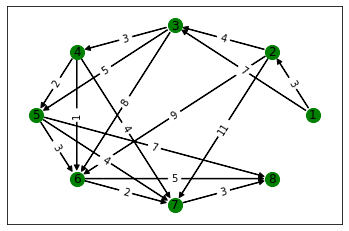

In [58]:
#достаём матрицу из файла
with open("matr2.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
#создаём граф
graph = create_graph(matrix)

draw_graph(graph)

#отображаем граф из файла
nt = Network(notebook = True)
nt.from_nx(graph)
nt.set_options(options)
nt.show("test.html")

Длина 16


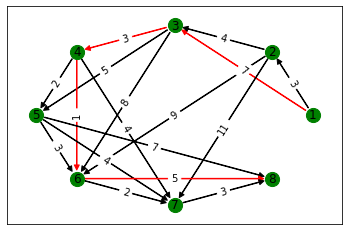

Длина 16


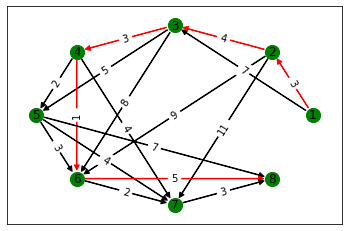

Длина 16


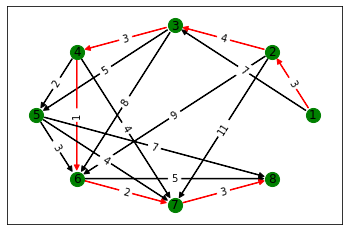

Длина 16


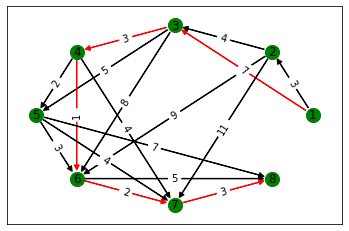

Длина 17


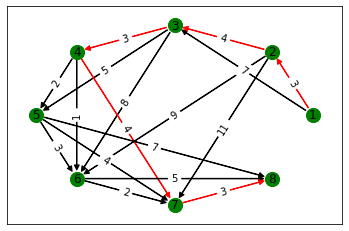

In [59]:
#алгоритм
def yen(__matrix, v, u, K):
    v -= 1
    u -= 1
    matrix = copy.deepcopy(__matrix)
    N = len(matrix)
    temp = dijkstra(matrix, v + 1, u + 1)
    candidates = set()
    paths = [[el - 1 for el in temp[1]]]
    lengths = [temp[0][u]]
    if len(paths[0]) < 2:
        return ([], [])
    for k in range (1, K):
        cur_mat = copy.deepcopy(matrix)
        for i in range(len(paths[-1]) - 1):
            spur_node = paths[-1][i]
            root_path = paths[-1][:i + 1]
            
            for path in paths:
                if root_path == path[:i + 1]:
                    cur_mat[path[i]][path[i + 1]] = math.inf
            
            for node in root_path:
                if node != spur_node:
                    cur_mat[node] = [math.inf for j in range(N)]
            
            temp = dijkstra(cur_mat, spur_node + 1, u + 1)
            spur_path = [el - 1 for el in temp[1][1:]]
            if len(spur_path) < 1:
                continue
            
            total_path = root_path
            total_path.extend(spur_path)
            total_path = tuple(total_path)
            distance = 0
            for j in range(1, len(total_path)):
                distance += matrix[total_path[j - 1]][total_path[j]]

            candidates.add((total_path, distance))
        if len(candidates) == 0:
            break
        
        sorted_candidates = list(candidates)
        sorted_candidates.sort(key = lambda x : x[1])
        paths.append(list(sorted_candidates[0][0]))
        lengths.append(sorted_candidates[0][1])
        candidates.remove(sorted_candidates[0])
    for i in range(len(paths)):
        paths[i] = [el + 1 for el in paths[i]]
    return (paths, lengths)

result = yen(matrix, 1, 8, 5)
paths = result[0]
#вносим графические изменения
for i in range(len(paths)):
    graph1 = copy.deepcopy(graph)
    path = paths[i]
    for j in range(1, len(path)):
        graph1.nodes[path[j - 1]]['color'] = 'red'
        graph1.edges[path[j - 1], path[j]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'
    nt1 = Network(notebook=True)
    nt1.prep_notebook()
    nt1.set_options(options)
    nt1.from_nx(graph1)
    nt1.show("test" + str(i + 3) + ".html")
    
    draw_graph(graph1, paths[i])
    print(f"Длина {result[1][i]}")
    plt.show()

In [60]:
#определение скорости работы алгоритма

tests = []

for i in range(20):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(i):
            if temp_matrix[j][i] != 0:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    c3 = random.randint(3, 10)
    result = yen(temp_matrix, c1, c2, c3)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, c3, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Кол-во маршрутов", "Время в мс"])

,Количество узлов,Количество ребер,Кол-во маршрутов,Время в мс
0,93,4278,10,443
1,37,666,5,25
2,67,2211,6,118
3,30,435,10,56
4,92,4186,9,366
5,95,4465,4,155
6,82,3321,8,383
7,91,4095,8,315
8,79,3081,5,124
9,37,666,6,44


### Вывод

Реализовал алгоритмы поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа.
Зделал возможным создание графа в виде матрицы смежности/инцидентности, читаемой из файла.
Разработал графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.
По результатам работы проанализировал временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа. Данные представил в виде таблицы.